<a href="https://colab.research.google.com/github/Zinnatullina-Regina/Colab_spring-loaded-pendulum/blob/main/Colab_spring-loaded-pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Один маятник

## Описание

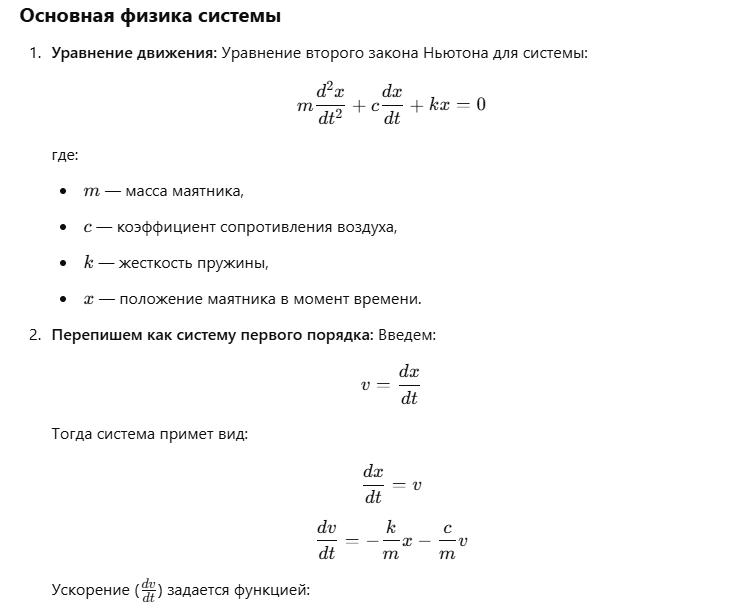


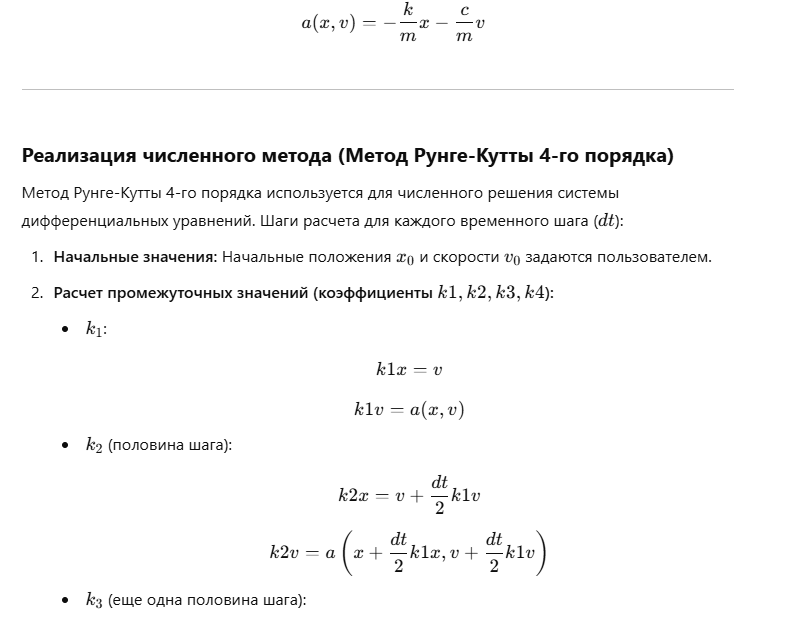

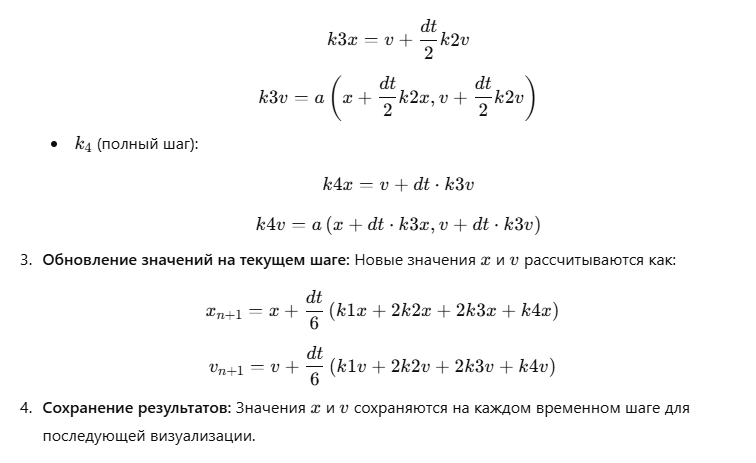

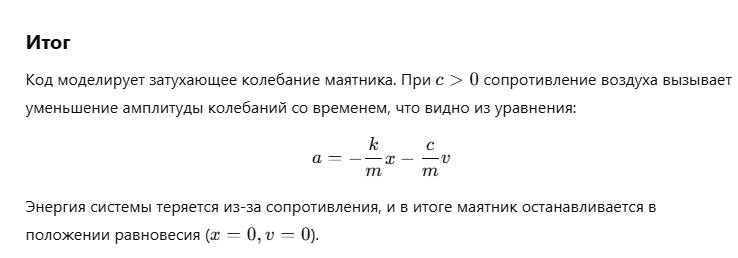

## Код

In [ ]:
# Метод Рунге-Кутты для численного решения
def runge_kutta(x0, v0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    x_values = []
    v_values = []

    x, v = x0, v0
    for t in t_values:
        x_values.append(x)
        v_values.append(v)

        # Расчет с использованием Рунге-Кутты
        k1x = v
        k1v = acceleration(x, v)

        k2x = v + 0.5 * dt * k1v
        k2v = acceleration(x + 0.5 * dt * k1x, v + 0.5 * dt * k1v)

        k3x = v + 0.5 * dt * k2v
        k3v = acceleration(x + 0.5 * dt * k2x, v + 0.5 * dt * k2v)

        k4x = v + dt * k3v
        k4v = acceleration(x + dt * k3x, v + dt * k3v)

        # Обновление значений
        x += dt * (k1x + 2*k2x + 2*k3x + k4x) / 6
        v += dt * (k1v + 2*k2v + 2*k3v + k4v) / 6

    return t_values, x_values, v_values

In [ ]:
# Функция для вычисления ускорения на основе текущих положения и скорости
def acceleration(x, v):
    return (-k * x - c * v) / m

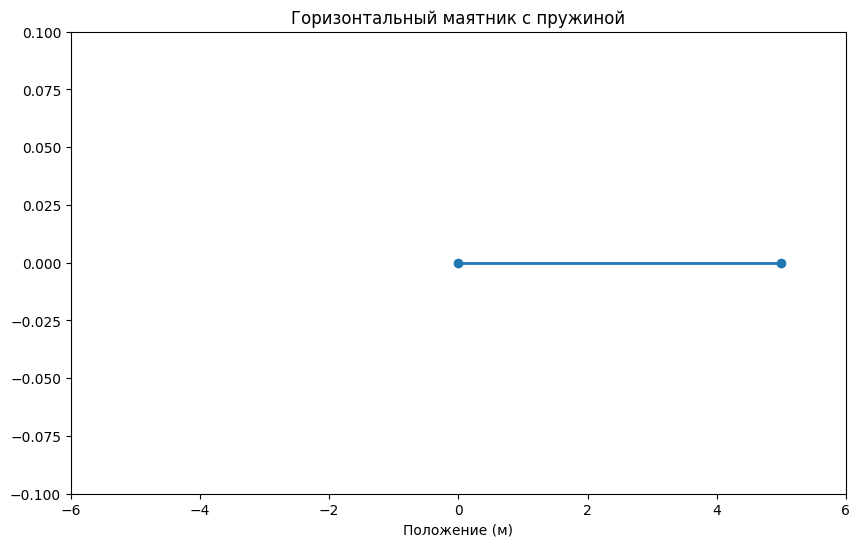

In [ ]:

# Параметры маятника
m = 1.0  # масса (кг)
k = 10.0  # жесткость пружины (Н/м)
c = 0  # коэффициент сопротивления воздуха (кг/с)

# Начальные условия
x0 = 5  # начальное отклонение
v0 = 0.0  # начальная скорость (м/с)

# Время моделирования
t_max = 10  # максимальное время (с)
dt = 0.01  # шаг по времени (с)


# Моделирование
t_values, x_values, v_values = runge_kutta(x0, v0, t_max, dt)

# Настройка графика для анимации
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-x0 - 1, x0 + 1)
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel('Положение (м)')
ax.set_title('Горизонтальный маятник с пружиной')

# Отображение пружины
line, = ax.plot([], [], 'o-', lw=2)

# Функция для обновления положения маятника в анимации
def update(frame):
    line.set_data([0, x_values[frame]], [0, 0])
    return line,

# Создание анимации
ani = FuncAnimation(fig, update, frames=len(t_values), interval=dt * 1000, blit=True)

# Сохранение анимации как видео
ani.save('pendulum_motion.mp4', writer='ffmpeg', fps=30)


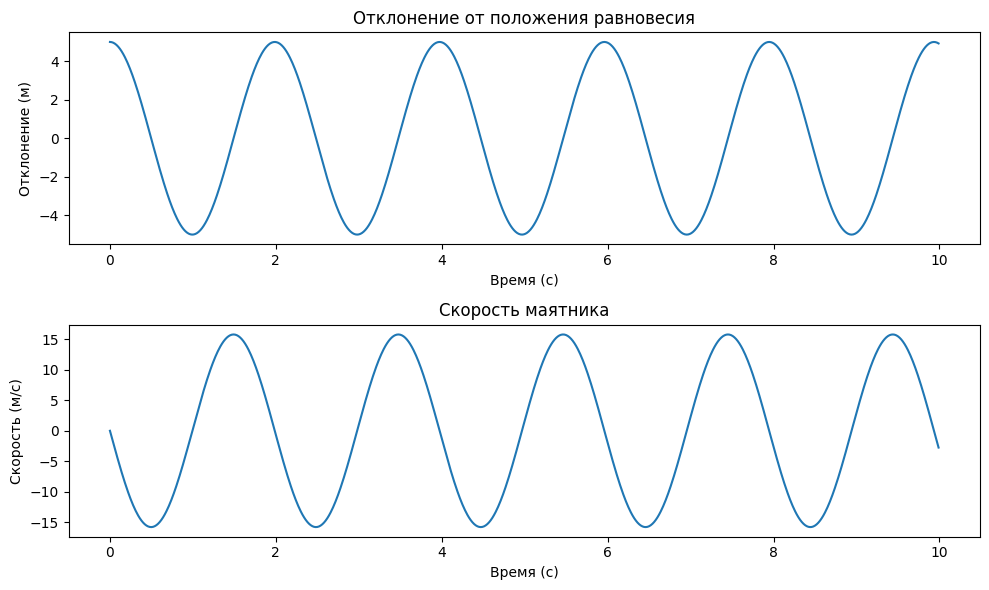

In [ ]:
plt.figure(figsize=(10, 6))

# График отклонения
plt.subplot(2, 1, 1)
plt.plot(t_values, x_values)
plt.title('Отклонение от положения равновесия')
plt.xlabel('Время (с)')
plt.ylabel('Отклонение (м)')

# График скорости
plt.subplot(2, 1, 2)
plt.plot(t_values, v_values)
plt.title('Скорость маятника')
plt.xlabel('Время (с)')
plt.ylabel('Скорость (м/с)')

plt.tight_layout()
plt.show()

# Система маятников

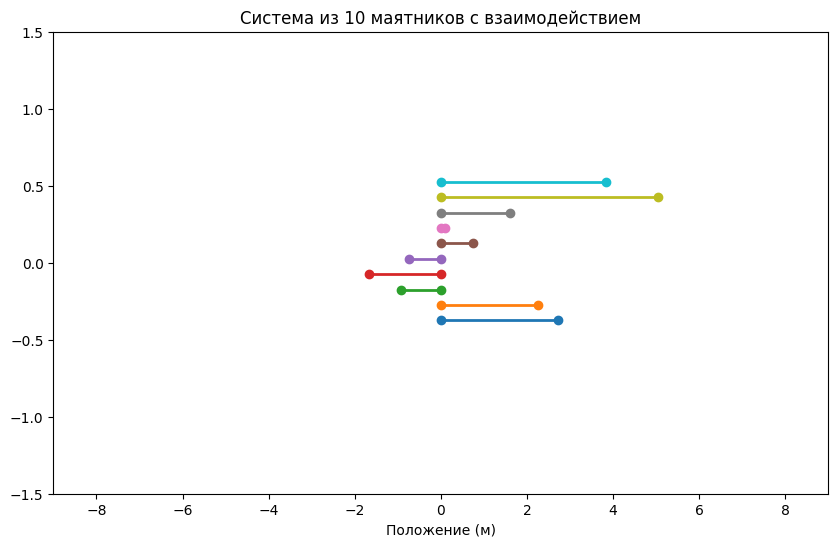

In [ ]:
# Параметры маятников
m = 1.0  # масса (кг) для всех маятников
k = 10.0  # жесткость пружины (Н/м) для всех маятников
c = 0  # коэффициент сопротивления воздуха (кг/с) для всех маятников
kappa = 5.0  # коэффициент взаимодействия между маятниками (Н/м)

# Начальные условия
x0 = [8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # начальная скорость для всех маятников

# Время моделирования
t_max = 10  # максимальное время (с)
dt = 0.01  # шаг по времени (с)

# Функция для вычисления ускорения на основе текущих положений и скоростей
def acceleration(x, v, k, c, kappa, i):
    if i == 0:
        # Для первого маятника
        F_interaction = kappa * (x[1] - x[0])
    elif i == 9:
        # Для последнего маятника
        F_interaction = kappa * (x[2] - x[3])
    else:
        # Для остальных маятников
        F_interaction = kappa * (x[i+1] - x[i]) + kappa * (x[i-1] - x[i])

    return (-k * x[i] - c * v[i] + F_interaction) / m

# Метод Рунге-Кутты для численного решения системы
def runge_kutta_system(x0, v0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    x_values = np.array([x0])
    v_values = np.array([v0])

    x = np.copy(x0)
    v = np.copy(v0)

    for t in t_values[1:]:
        k1x = np.copy(v)
        k1v = np.array([acceleration(x, v, k, c, kappa, i) for i in range(10)])

        k2x = v + 0.5 * dt * k1v
        k2v = np.array([acceleration(x + 0.5 * dt * k1x, v + 0.5 * dt * k1v, k, c, kappa, i) for i in range(10)])

        k3x = v + 0.5 * dt * k2v
        k3v = np.array([acceleration(x + 0.5 * dt * k2x, v + 0.5 * dt * k2v, k, c, kappa, i) for i in range(10)])

        k4x = v + dt * k3v
        k4v = np.array([acceleration(x + dt * k3x, v + dt * k3v, k, c, kappa, i) for i in range(10)])

        x += dt * (k1x + 2*k2x + 2*k3x + k4x) / 6
        v += dt * (k1v + 2*k2v + 2*k3v + k4v) / 6

        x_values = np.vstack((x_values, x))
        v_values = np.vstack((v_values, v))

    return t_values, x_values, v_values

# Моделирование
t_values, x_values, v_values = runge_kutta_system(x0, v0, t_max, dt)

# Настройка графика для анимации
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-max(x0) - 1, max(x0) + 1)
ax.set_ylim(-1.5, 1.5)  # для вертикального расположения маятников
ax.set_xlabel('Положение (м)')
ax.set_title('Система из 10 маятников с взаимодействием')

# Отображение маятников
lines = [ax.plot([], [], 'o-', lw=2)[0] for _ in range(10)]

# Функция для обновления положения маятников в анимации
def update(frame):
    for i in range(10):
        # Положение маятника вдоль оси X и на разных высотах по оси Y
        lines[i].set_data([0, x_values[frame, i]], [i * 0.1 - 0.375, i * 0.1 - 0.375])
    return lines

# Создание анимации
ani = FuncAnimation(fig, update, frames=len(t_values), interval=dt * 1000, blit=True)

# Сохранение анимации как видео
ani.save('pendulum_system_vertical_motion.mp4', writer='ffmpeg', fps=15)

plt.show()
